# MIKE21 HD

Water level comparison between MIKE21 HD and observations from the
Oresund.

In [1]:
import modelskill as ms

In [2]:
mr = ms.model_result('../data/Oresund2D.dfsu',
                     item='Surface elevation')
mr

<DfsuModelResult>: Oresund2D
Time: 2018-03-04 00:00:00 - 2018-03-10 22:40:00
Quantity: Surface Elevation [m]

In [3]:
mr.data.geometry.projection

'UTM-33'

Coordinate reference system used in this model is UTM-33.

In [4]:
o1 = ms.PointObservation('../data/smhi_2095_klagshamn.dfs0', item=0,
    x=366844.15, y=6154291.6) # UTM-33
o1

<PointObservation>: smhi_2095_klagshamn
Location: 366844.15, 6154291.6
Time: 2015-01-01 01:00:00 - 2020-09-28 00:00:00
Quantity: Water Level [m]

## Spatial overview

Confirm that the observation is correctly located in the model domain.

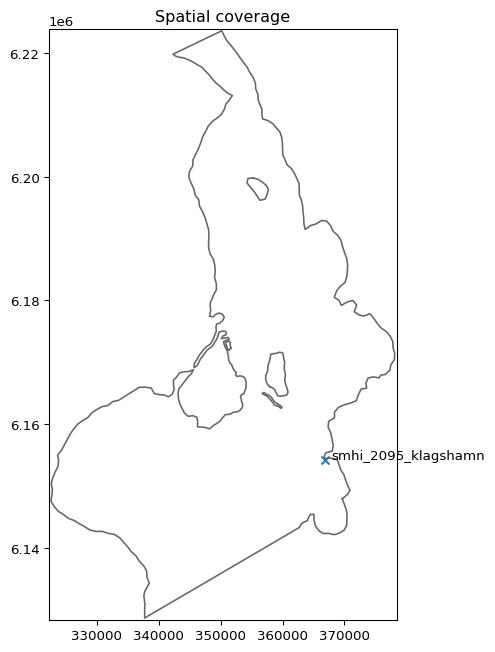

In [5]:
ms.plotting.spatial_overview(o1, mr, figsize=(8, 8));

Match the observed data to the model result (interpolate the model
result to the observation points).

In [6]:
cmp = ms.match(o1, mr)
cmp

<Comparer>
Quantity: Water Level [m]
Observation: smhi_2095_klagshamn, n_points=167
Model(s):
0: Oresund2D

In [7]:
fig = cmp.plot.timeseries(backend="plotly")
fig.show()

The reference level is not the same for the model and the observation.
We can remove the bias from the model result to make the comparison more
fair.

In [8]:
ub_cmp = cmp.remove_bias()
ub_cmp.plot.timeseries(backend="plotly").show();

The bias is removed, which affects the rmse, but not the un-biased
version urmse.

In [9]:
cmp.skill()

In [10]:
ub_cmp.skill()

## Scatter plot

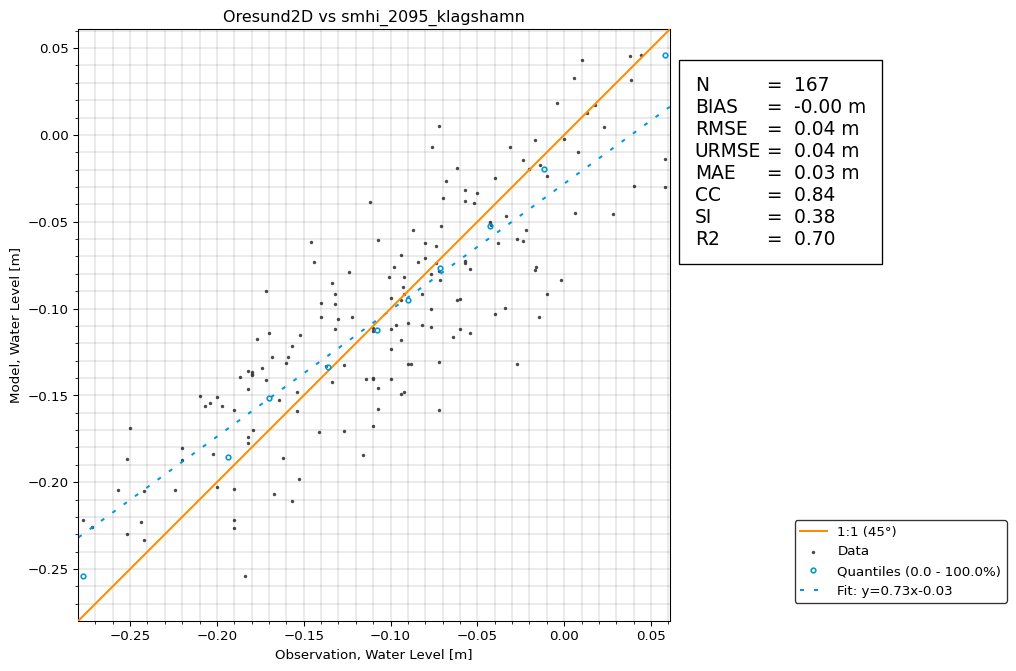

In [11]:
ms.load_style("MOOD")
ub_cmp.plot.scatter(skill_table=True);